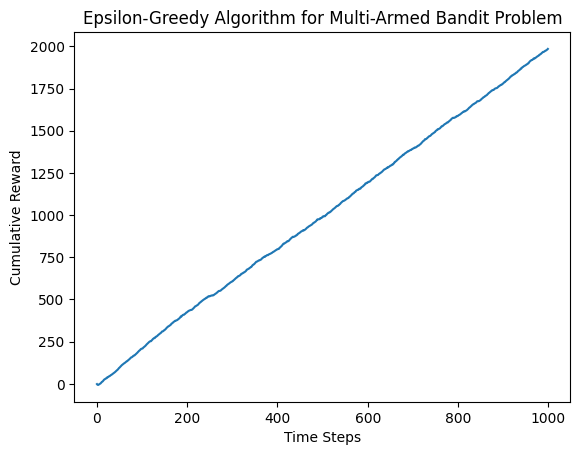

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (actions)
num_arms = 10

# True mean reward for each arm (unknown to the agent)
true_means = np.random.normal(loc=0, scale=1, size=num_arms)

# Number of time steps (iterations)
num_steps = 1000

# Epsilon for epsilon-greedy algorithm (probability of exploration)
epsilon = 0.1

# Initialize variables
action_values = np.zeros(num_arms)  # Estimated values of each action
action_counts = np.zeros(num_arms)  # Number of times each action has been chosen
total_reward = 0  # Total cumulative reward

# Store the history of rewards for plotting
reward_history = []

# Epsilon-Greedy Algorithm
for step in range(num_steps):
    # Explore with probability epsilon, otherwise exploit
    if np.random.rand() < epsilon:
        # Explore: Choose a random action
        chosen_action = np.random.randint(num_arms)
    else:
        # Exploit: Choose the action with the highest estimated value
        chosen_action = np.argmax(action_values)

    # Get the reward for the chosen action
    reward = np.random.normal(loc=true_means[chosen_action], scale=1)

    # Update action values and counts
    action_values[chosen_action] = (
        (action_values[chosen_action] * action_counts[chosen_action] + reward) /
        (action_counts[chosen_action] + 1)
    )
    action_counts[chosen_action] += 1

    # Update total cumulative reward
    total_reward += reward

    # Append the reward to the history for plotting
    reward_history.append(total_reward)

# Plot the cumulative reward over time
plt.plot(reward_history)
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy Algorithm for Multi-Armed Bandit Problem')
plt.show()


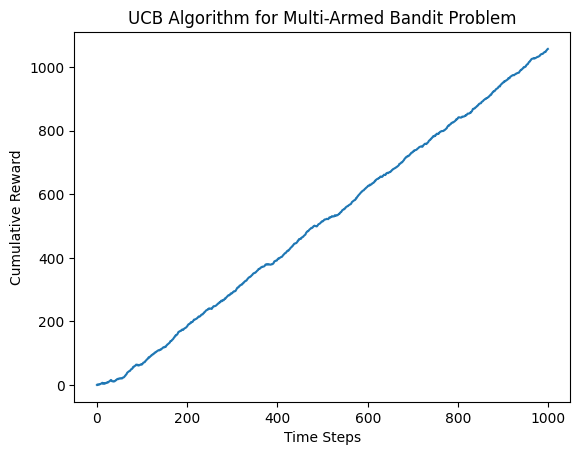

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (actions)
num_arms = 10

# True mean reward for each arm (unknown to the agent)
true_means = np.random.normal(loc=0, scale=1, size=num_arms)

# Number of time steps (iterations)
num_steps = 1000

# Initialize variables
action_values = np.zeros(num_arms)  # Estimated values of each action
action_counts = np.zeros(num_arms)  # Number of times each action has been chosen
total_reward = 0  # Total cumulative reward

# Store the history of rewards for plotting
reward_history = []

# UCB Algorithm
for step in range(num_steps):
    # Choose action using UCB formula
    ucb_values = action_values + np.sqrt(2 * np.log(step + 1) / (action_counts + 1e-6))
    chosen_action = np.argmax(ucb_values)

    # Get the reward for the chosen action
    reward = np.random.normal(loc=true_means[chosen_action], scale=1)

    # Update action values and counts
    action_values[chosen_action] = (
        (action_values[chosen_action] * action_counts[chosen_action] + reward) /
        (action_counts[chosen_action] + 1)
    )
    action_counts[chosen_action] += 1

    # Update total cumulative reward
    total_reward += reward

    # Append the reward to the history for plotting
    reward_history.append(total_reward)

# Plot the cumulative reward over time
plt.plot(reward_history)
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.title('UCB Algorithm for Multi-Armed Bandit Problem')
plt.show()
